In [2]:
import dicom # for reading dicom files
import os # for doing directory operations 
import pandas as pd # for some simple data analysis (right now, just to load in the labels data and quickly reference it)
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2

data_dir = './input/sample_images/'
patients = os.listdir(data_dir)
labels_df = pd.read_csv('./input/stage1_labels.csv', index_col=0)

labels_df.head()

/usr/local/lib/python2.7/dist-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


,cancer
id,
0015ceb851d7251b8f399e39779d1e7d,1
0030a160d58723ff36d73f41b170ec21,0
003f41c78e6acfa92430a057ac0b306e,0
006b96310a37b36cccb2ab48d10b49a3,1
008464bb8521d09a42985dd8add3d0d2,1


In [3]:
for patient in patients[:1]:
    label = labels_df.get_value(patient, 'cancer')
    path = data_dir + patient
    
    # a couple great 1-liners from: https://www.kaggle.com/gzuidhof/data-science-bowl-2017/full-preprocessing-tutorial
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    print(len(slices),label)
    print(slices[0])

(203, 1)
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7009.9004.303642909119486713425375993752
(0008, 0060) Modality                            CS: 'CT'
(0008, 103e) Series Description                  LO: 'Axial'
(0010, 0010) Patient's Name                      PN: '0acbebb8d463b4b9ca88cf38431aac69'
(0010, 0020) Patient ID                          LO: '0acbebb8d463b4b9ca88cf38431aac69'
(0010, 0030) Patient's Birth Date                DA: '19000101'
(0018, 0060) KVP                                 DS: ''
(0020, 000d) Study Instance UID                  UI: 2.25.66234994940093060530875882673593880723182397297085825139120
(0020, 000e) Series Instance UID                 UI: 2.25.27985737130106072918310533525688877208529713445697698517643
(0020, 0011) Series Number                       IS: '4'
(0020, 0012) Acquisition Numb

In [4]:
#so we have 20 pateints, each patient have around around 150 images avg and each image is about 512x512
#in real data 1595 patients....!!

In [5]:
def showScan(patientIndex):
    for patient in patients[:patientIndex]:
        label = labels_df.get_value(patient, 'cancer')
        path = data_dir + patient
        slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
        slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
        plt.imshow(slices[0].pixel_array)
        plt.show()

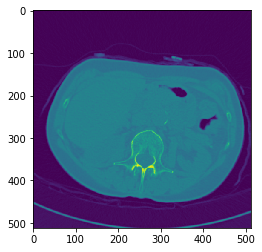

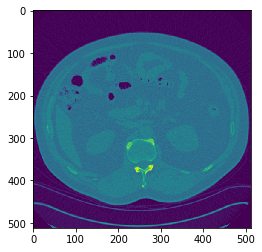

In [6]:
showScan(2)

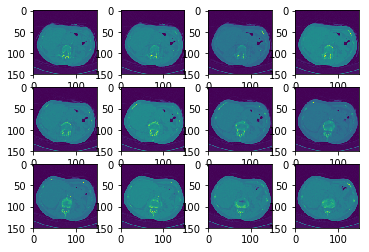

In [7]:
import cv2
import numpy as np

IMG_PX_SIZE = 150

for patient in patients[:1]:
    label = labels_df.get_value(patient, 'cancer')
    path = data_dir + patient
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    fig = plt.figure()
    for num,each_slice in enumerate(slices[:12]):
        y = fig.add_subplot(3,4,num+1)
        new_img = cv2.resize(np.array(each_slice.pixel_array),(IMG_PX_SIZE,IMG_PX_SIZE))
        y.imshow(new_img)
    plt.show()


In [8]:
print(type(slices))

<type 'list'>


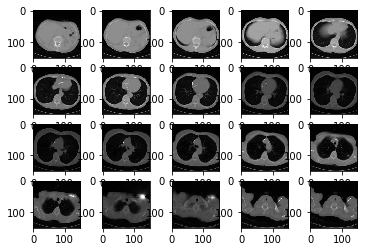

(203, 20)


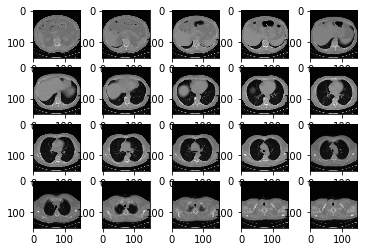

(171, 20)


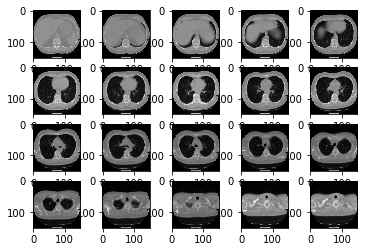

(133, 20)


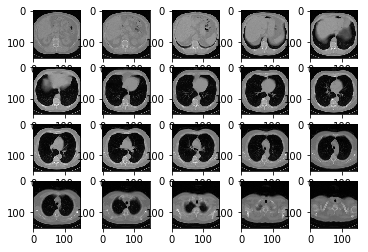

(180, 20)


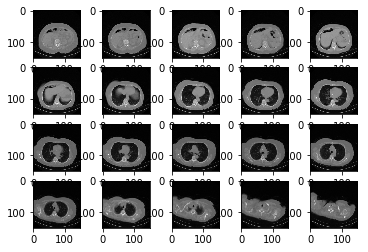

(435, 20)


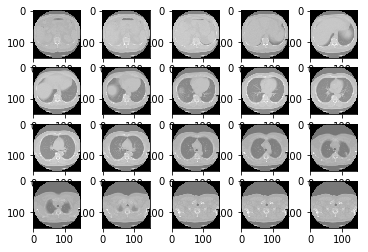

(123, 20)


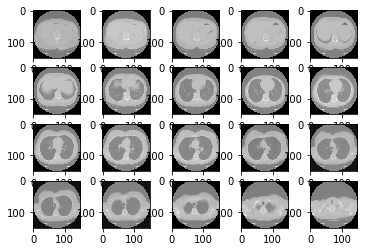

(280, 20)


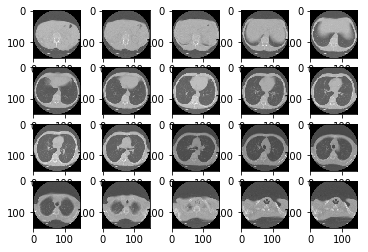

(221, 20)


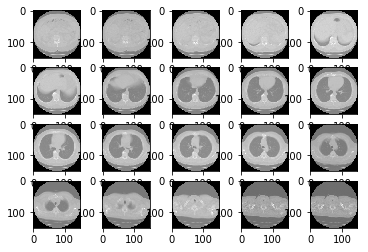

(183, 20)


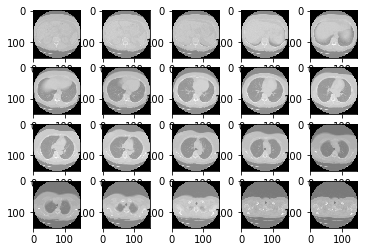

(128, 20)


In [10]:
from __future__ import division

def chunkMaker(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

def mean(l):
    return sum(l) / len(l)

IMG_PX_SIZE = 150
HM_SLICES = 20

data_dir = './input/sample_images/'
patients = os.listdir(data_dir)
labels_df = pd.read_csv('./input/stage1_labels.csv', index_col=0)

for patient in patients[:10]:
    try:
        label = labels_df.get_value(patient, 'cancer')
        path = data_dir + patient
        slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
        slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
        new_slices = []
        slices = [cv2.resize(np.array(each_slice.pixel_array),(IMG_PX_SIZE,IMG_PX_SIZE)) for each_slice in slices]
        chunk_sizes = int(math.ceil(len(slices)/20))
        for slice_chunk in chunkMaker(slices, chunk_sizes):
            slice_chunk = list(map(mean, zip(*slice_chunk)))
            #print(len(slice_chunk))
            new_slices.append(slice_chunk)

        if len(new_slices) == HM_SLICES-1:
            new_slices.append(new_slices[-1])

        if len(new_slices) == HM_SLICES-2:
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-2])
        
        fig = plt.figure()
        for num,each_slice in enumerate(new_slices):
            y = fig.add_subplot(4,5,num+1)
            y.imshow(each_slice, cmap='gray')
        plt.show()    
            
        print(len(slices), len(new_slices))
    except:
        # some patients don't have labels, so we'll just pass on this for now
        pass

In [102]:
import numpy as np
import pandas as pd
import dicom
import os
import matplotlib.pyplot as plt
import cv2
import math

IMG_SIZE_PX = 50
SLICE_COUNT = 20

from __future__ import division

def chunkMaker(l, n):
    count=0
    for i in range(0, len(l), n):
        if(count < HM_SLICES):
            yield l[i:i + n]
            count=count+1


def mean(a):
    #print("mean is"+str((sum(a)/len(a))))
    return sum(a) / len(a)


def process_data(patient,labels_df,img_px_size=50, hm_slices=20, visualize=False):
    
        label = labels_df.get_value(patient, 'cancer')
        path = data_dir + patient
        slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
        slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
        new_slices = []
        slices = [cv2.resize(np.array(each_slice.pixel_array),(int(IMG_PX_SIZE/3),int(IMG_PX_SIZE/3))) for each_slice in slices]
        print(np.array(slices).shape)
        chunk_sizes = int(math.ceil(len(slices)/20))
        for slice_chunk in chunkMaker(slices, chunk_sizes):
            slice_chunk = list(map(mean, zip(*slice_chunk)))
            #print(len(slice_chunk))
            new_slices.append(slice_chunk)

        if len(new_slices) == HM_SLICES-1:
            new_slices.append(new_slices[-1])

        if len(new_slices) == HM_SLICES-2:
            new_slices.append(new_slices[-1])
            new_slices.append(new_slices[-2])
            
        if len(new_slices) == HM_SLICES+2:
            new_val = list(map(mean, zip(*[new_slices[HM_SLICES-1],new_slices[HM_SLICES],])))
            del new_slices[HM_SLICES]
            new_slices[HM_SLICES-1] = new_val

        if len(new_slices) == HM_SLICES+1:
            new_val = list(map(mean, zip(*[new_slices[HM_SLICES-1],new_slices[HM_SLICES],])))
            del new_slices[HM_SLICES]
            new_slices[HM_SLICES-1] = new_val    

        if visualize:
            fig = plt.figure()
            for num,each_slice in enumerate(new_slices):
                y = fig.add_subplot(4,5,num+1)
                y.imshow(each_slice, cmap='gray')
            plt.show()

        # if label == 1: label=[1]
        #elif label == 0: label=[0]
        print(np.array(new_slices).shape,label)
        return np.array(new_slices),label

#                                               stage 1 for real.
data_dir = './input/sample_images/'
patients = os.listdir(data_dir)
labels = pd.read_csv('./input/stage1_labels.csv', index_col=0)

much_data = []
much_label=np.array((1))
for num,patient in enumerate(patients):
    if num % 100 == 0:
        print(num)
    try:
        img_data,label = process_data(patient,labels,img_px_size=IMG_SIZE_PX, hm_slices=SLICE_COUNT)
        #print(img_data.shape,label)
        much_data.append(img_data)
        much_label=np.hstack((much_label,np.array(label)))
    except KeyError as e:
        print('This is unlabeled data!')
print(len(much_data),len(much_label))
np.save('muchdata-{}-{}-{}.npy'.format(IMG_SIZE_PX,IMG_SIZE_PX,SLICE_COUNT), much_data)
np.save('muchlabel-{}-{}-{}.npy'.format(IMG_SIZE_PX,IMG_SIZE_PX,SLICE_COUNT), much_label[1:])

0
(131, 50, 50)
((20, 50, 50), 0)
(132, 50, 50)
((20, 50, 50), 0)
(125, 50, 50)
((20, 50, 50), 0)
(134, 50, 50)
((20, 50, 50), 1)
(210, 50, 50)
((20, 50, 50), 0)
(203, 50, 50)
((20, 50, 50), 1)
(173, 50, 50)
((20, 50, 50), 0)
(141, 50, 50)
((20, 50, 50), 0)
(188, 50, 50)
((20, 50, 50), 0)
(171, 50, 50)
((20, 50, 50), 0)
This is unlabeled data!
(161, 50, 50)
((20, 50, 50), 0)
(214, 50, 50)
((20, 50, 50), 1)
This is unlabeled data!
(141, 50, 50)
((20, 50, 50), 0)
(208, 50, 50)
((20, 50, 50), 0)
(172, 50, 50)
((20, 50, 50), 0)
(133, 50, 50)
((20, 50, 50), 0)
(149, 50, 50)
((20, 50, 50), 0)
(180, 50, 50)
((20, 50, 50), 0)
(171, 50, 50)
((20, 50, 50), 0)
(162, 50, 50)
((20, 50, 50), 0)
(140, 50, 50)
((20, 50, 50), 0)
(435, 50, 50)
((20, 50, 50), 1)
(151, 50, 50)
((20, 50, 50), 0)
(130, 50, 50)
((20, 50, 50), 0)
(111, 50, 50)
((20, 50, 50), 0)
(201, 50, 50)
((20, 50, 50), 0)
(159, 50, 50)
((20, 50, 50), 1)
(167, 50, 50)
((20, 50, 50), 0)
(110, 50, 50)
((20, 50, 50), 0)
(231, 50, 50)
((20, 50

In [103]:
import tensorflow as tf

noClasses = 2
batch_size = 10


much_data = np.load('muchdata-50-50-20.npy')
much_label = np.load('muchlabel-50-50-20.npy')

def reformat(dataset, labels):
  dataset = dataset.reshape((-1, 20*IMG_SIZE_PX * IMG_SIZE_PX)).astype(np.float32)
  # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
  labels = (np.arange(noClasses) == labels[:,None]).astype(np.float32)
  return dataset, labels

dataSize=len(much_data)
trainPart=0.6
validPart=0.2
testPart=0.2
train_dataset=much_data[:int(dataSize*trainPart)]
valid_dataset=much_data[int(dataSize*trainPart):int(dataSize*(trainPart+validPart))]
test_dataset=much_data[int(dataSize*(trainPart+validPart)):]
train_labels=much_label[:int(dataSize*trainPart)]
valid_labels=much_label[int(dataSize*trainPart):int(dataSize*(trainPart+validPart))]
test_labels=much_label[int(dataSize*(trainPart+validPart)):]

print(train_dataset.shape,train_labels.shape)
train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)

print(train_dataset.shape,train_labels.shape)
print(valid_dataset.shape,valid_labels.shape)
print(test_dataset.shape,test_labels.shape)

((61, 20, 50, 50), (61,))
((61, 50000), (61, 2))
((21, 50000), (21, 2))
((21, 50000), (21, 2))


In [104]:
train_subset = 10000

graph = tf.Graph()
with graph.as_default():

  # Input data.
  # Load the training, validation and test data into constants that are
  # attached to the graph.
  tf_train_dataset = tf.constant(train_dataset)
  tf_train_labels = tf.constant(train_labels)
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  
  # Variables.
  # These are the parameters that we are going to be training. The weight
  # matrix will be initialized using random values following a (truncated)
  # normal distribution. The biases get initialized to zero.
  weights = tf.Variable(
    tf.truncated_normal([50000 , noClasses]))
  biases = tf.Variable(tf.zeros([noClasses]))
  
  # Training computation.
  # We multiply the inputs with the weight matrix, and add biases. We compute
  # the softmax and cross-entropy (it's one operation in TensorFlow, because
  # it's very common, and it can be optimized). We take the average of this
  # cross-entropy across all training examples: that's our loss.
  logits = tf.matmul(tf_train_dataset, weights) + biases
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
  print("loss is",loss)
  # Optimizer.
  # We are going to find the minimum of this loss using gradient descent.
  optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  # These are not part of training, but merely here so that we can report
  # accuracy figures as we train.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(
    tf.matmul(tf_valid_dataset, weights) + biases)
  test_prediction = tf.nn.softmax(tf.matmul(tf_test_dataset, weights) + biases)

('loss is', <tf.Tensor 'Mean:0' shape=() dtype=float32>)


In [107]:
num_steps = 801

def accuracy(predictions, labels):
  print(predictions.shape[0])  
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

with tf.Session(graph=graph) as session:
  # This is a one-time operation which ensures the parameters get initialized as
  # we described in the graph: random weights for the matrix, zeros for the
  # biases. 
  tf.global_variables_initializer().run()
  print('Initialized')
  for step in range(num_steps):
    # Run the computations. We tell .run() that we want to run the optimizer,
    # and get the loss value and the training predictions returned as numpy
    # arrays.
    _, l, predictions = session.run([optimizer, loss, train_prediction])
    if (step % 100 == 0):
      print('Loss at step %d: %f' % (step, l))
      print('Training accuracy: %.1f%%' % accuracy(
        predictions, train_labels[:train_subset, :]))
      # Calling .eval() on valid_prediction is basically like calling run(), but
      # just to get that one numpy array. Note that it recomputes all its graph
      # dependencies.
      print('Validation accuracy: %.1f%%' % accuracy(
        valid_prediction.eval(), valid_labels))
  print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels))
  #print(test_prediction.eval(),test_labels)

Initialized
Loss at step 0: 223104.750000
61
Training accuracy: 26.2%
21
Validation accuracy: 81.0%
Loss at step 100: 0.000000
61
Training accuracy: 100.0%
21
Validation accuracy: 76.2%
Loss at step 200: 0.000000
61
Training accuracy: 100.0%
21
Validation accuracy: 76.2%
Loss at step 300: 0.000000
61
Training accuracy: 100.0%
21
Validation accuracy: 76.2%
Loss at step 400: 0.000000
61
Training accuracy: 100.0%
21
Validation accuracy: 76.2%
Loss at step 500: 0.000000
61
Training accuracy: 100.0%
21
Validation accuracy: 76.2%
Loss at step 600: 0.000000
61
Training accuracy: 100.0%
21
Validation accuracy: 76.2%
Loss at step 700: 0.000000
61
Training accuracy: 100.0%
21
Validation accuracy: 76.2%
Loss at step 800: 0.000000
61
Training accuracy: 100.0%
21
Validation accuracy: 76.2%
21
Test accuracy: 71.4%


In [108]:
batch_size = 16
num_hidden_nodes1 = 1024
num_hidden_nodes2 = 512
num_hidden_nodes3 = 256
keep_prob = 0.5

graph = tf.Graph()
with graph.as_default():

  # Input data. For the training data, we use a placeholder that will be fed
  # at run time with a training minibatch.
  tf_train_dataset = tf.placeholder(tf.float32,
                                    shape=(batch_size, 50000))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, noClasses))
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  global_step = tf.Variable(0)

  # Variables.
  weights1 = tf.Variable(
    tf.truncated_normal(
        [50000, num_hidden_nodes1],
        stddev=np.sqrt(2.0 / (50000)))
    )
  biases1 = tf.Variable(tf.zeros([num_hidden_nodes1]))
  weights2 = tf.Variable(
    tf.truncated_normal([num_hidden_nodes1, num_hidden_nodes2], stddev=np.sqrt(2.0 / num_hidden_nodes1)))
  biases2 = tf.Variable(tf.zeros([num_hidden_nodes2]))
  weights3 = tf.Variable(
    tf.truncated_normal([num_hidden_nodes2, num_hidden_nodes3], stddev=np.sqrt(2.0 / num_hidden_nodes2)))
  biases3 = tf.Variable(tf.zeros([num_hidden_nodes3]))
  weights4 = tf.Variable(
    tf.truncated_normal([num_hidden_nodes3, noClasses], stddev=np.sqrt(2.0 / num_hidden_nodes3)))
  biases4 = tf.Variable(tf.zeros([noClasses]))
  
  # Training computation.
  lay1_train = tf.nn.relu(tf.matmul(tf_train_dataset, weights1) + biases1)
  drop1 = tf.nn.dropout(lay1_train, 0.5)
  lay2_train = tf.nn.relu(tf.matmul(drop1, weights2) + biases2)
  drop2 = tf.nn.dropout(lay2_train, 0.5)
  lay3_train = tf.nn.relu(tf.matmul(drop2, weights3) + biases3)
  drop3 = tf.nn.dropout(lay3_train, 0.5)
  logits = tf.matmul(drop3, weights4) + biases4
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=tf_train_labels))
    
  # Optimizer.
  learning_rate = tf.train.exponential_decay(0.5, global_step, 5000, 0.80, staircase=True)
  optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  lay1_valid = tf.nn.relu(tf.matmul(tf_valid_dataset, weights1) + biases1)
  lay2_valid = tf.nn.relu(tf.matmul(lay1_valid, weights2) + biases2)
  lay3_valid = tf.nn.relu(tf.matmul(lay2_valid, weights3) + biases3)
  valid_prediction = tf.nn.softmax(tf.matmul(lay3_valid, weights4) + biases4)
  lay1_test = tf.nn.relu(tf.matmul(tf_test_dataset, weights1) + biases1)
  lay2_test = tf.nn.relu(tf.matmul(lay1_test, weights2) + biases2)
  lay3_test = tf.nn.relu(tf.matmul(lay2_test, weights3) + biases3)
  test_prediction = tf.nn.softmax(tf.matmul(lay3_test, weights4) + biases4)

In [111]:
num_steps = 1001

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print("Initialized")
  for step in range(num_steps):
    # Pick an offset within the training data, which has been randomized.
    # Note: we could use better randomization across epochs.
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    # Generate a minibatch.
    batch_data = train_dataset[offset:(offset + batch_size), :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    # Prepare a dictionary telling the session where to feed the minibatch.
    # The key of the dictionary is the placeholder node of the graph to be fed,
    # and the value is the numpy array to feed to it.
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 50 == 0):
      print("Minibatch loss at step %d: %f" % (step, l))
      print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
      print("Validation accuracy: %.1f%%" % accuracy(
        valid_prediction.eval(), valid_labels))
  print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Initialized
Minibatch loss at step 0: 388.189362
16
Minibatch accuracy: 75.0%
21
Validation accuracy: 81.0%
Minibatch loss at step 50: nan
16
Minibatch accuracy: 62.5%
21
Validation accuracy: 81.0%
Minibatch loss at step 100: nan
16
Minibatch accuracy: 68.8%
21
Validation accuracy: 81.0%
Minibatch loss at step 150: nan
16
Minibatch accuracy: 75.0%
21
Validation accuracy: 81.0%
Minibatch loss at step 200: nan
16
Minibatch accuracy: 87.5%
21
Validation accuracy: 81.0%
Minibatch loss at step 250: nan
16
Minibatch accuracy: 68.8%
21
Validation accuracy: 81.0%
Minibatch loss at step 300: nan
16
Minibatch accuracy: 75.0%
21
Validation accuracy: 81.0%
Minibatch loss at step 350: nan
16
Minibatch accuracy: 75.0%
21
Validation accuracy: 81.0%
Minibatch loss at step 400: nan
16
Minibatch accuracy: 87.5%
21
Validation accuracy: 81.0%
Minibatch loss at step 450: nan
16
Minibatch accuracy: 81.2%
21
Validation accuracy: 81.0%


In [114]:
threeDData = np.load('muchdata-50-50-20.npy')
threeDLabel = np.load('muchlabel-50-50-20.npy')

def reformat(dataset, labels):
  dataset = dataset.reshape((-1,100 ,100,5)).astype(np.float32)
  # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
  labels = (np.arange(noClasses) == labels[:,None]).astype(np.float32)
  return dataset, labels

dataSize=len(much_data)
trainPart=0.6
validPart=0.2
testPart=0.2
train_dataset=threeDData[:int(dataSize*trainPart)]
valid_dataset=threeDData[int(dataSize*trainPart):int(dataSize*(trainPart+validPart))]
test_dataset=threeDData[int(dataSize*(trainPart+validPart)):]
train_labels=threeDLabel[:int(dataSize*trainPart)]
valid_labels=threeDLabel[int(dataSize*trainPart):int(dataSize*(trainPart+validPart))]
test_labels=threeDLabel[int(dataSize*(trainPart+validPart)):]

print(train_dataset.shape,train_labels.shape)
train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)

print(train_dataset.shape,train_labels.shape)
print(valid_dataset.shape,valid_labels.shape)
print(test_dataset.shape,test_labels.shape)

((61, 20, 50, 50), (61,))
((61, 100, 100, 5), (61, 2))
((21, 100, 100, 5), (21, 2))
((21, 100, 100, 5), (21, 2))


In [124]:
batch_size = 16
patch_size = 5
depth = 16
num_hidden = 64
num_channels=5

graph = tf.Graph()

with graph.as_default():

  # Input data.
  tf_train_dataset = tf.placeholder(
    tf.float32, shape=(batch_size,100,100, num_channels))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, noClasses))
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  
  # Variables.
  layer1_weights = tf.Variable(tf.truncated_normal(
      [patch_size, patch_size, num_channels, depth], stddev=0.1))
  layer1_biases = tf.Variable(tf.zeros([depth]))
  layer2_weights = tf.Variable(tf.truncated_normal(
      [(patch_size+4), (patch_size+4), depth, depth], stddev=0.1))
  layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth]))
  size3 = 20
  layer3_weights = tf.Variable(tf.truncated_normal(
      [size3 * size3 * depth, num_hidden], stddev=0.1))
  layer3_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
  layer4_weights = tf.Variable(tf.truncated_normal(
      [num_hidden, noClasses], stddev=0.1))
  layer4_biases = tf.Variable(tf.constant(1.0, shape=[noClasses]))
  
  # Model.
  def model(data):
    # C1 input 28 x 28
    conv1 = tf.nn.conv2d(data, layer1_weights, [1, 1, 1, 1], padding='VALID')
    bias1 = tf.nn.relu(conv1 + layer1_biases)
    print(bias1.get_shape().as_list())
    # S2 input 96x96
    pool2 = tf.nn.avg_pool(bias1, [1, 2, 2, 1], [1, 2, 2, 1], padding='VALID')
    # C3 input 48x48
    print(pool2.get_shape().as_list())
    conv3 = tf.nn.conv2d(pool2, layer2_weights, [1, 1, 1, 1], padding='VALID')
    bias3 = tf.nn.relu(conv3 + layer2_biases)
    print(bias3.get_shape().as_list())
    # S4 input 40x40
    pool4 = tf.nn.avg_pool(bias3, [1, 2, 2, 1], [1, 2, 2, 1], padding='VALID')
    print(pool4.get_shape().as_list())
    # F6 input 20x20
    shape = pool4.get_shape().as_list()
    reshape = tf.reshape(pool4, [shape[0], shape[1] * shape[2] * shape[3]])
    hidden = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
    return tf.matmul(hidden, layer4_weights) + layer4_biases
  
  # Training computation.
  logits = model(tf_train_dataset)
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=tf_train_labels))
    
  # Optimizer.
  optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
  test_prediction = tf.nn.softmax(model(tf_test_dataset))  

[16, 96, 96, 16]
[16, 48, 48, 16]
[16, 40, 40, 16]
[16, 20, 20, 16]
[21, 96, 96, 16]
[21, 48, 48, 16]
[21, 40, 40, 16]
[21, 20, 20, 16]
[21, 96, 96, 16]
[21, 48, 48, 16]
[21, 40, 40, 16]
[21, 20, 20, 16]


In [125]:
num_steps = 501

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print('Initialized')
  for step in range(num_steps):
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 100 == 0):
      print('Minibatch loss at step %d: %f' % (step, l))
      print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
      print('Validation accuracy: %.1f%%' % accuracy(
        valid_prediction.eval(), valid_labels))
  print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Initialized
Minibatch loss at step 0: 4812.207520
16
Minibatch accuracy: 18.8%
21
Validation accuracy: 81.0%
Minibatch loss at step 100: 0.641317
16
Minibatch accuracy: 68.8%
21
Validation accuracy: 81.0%
Minibatch loss at step 200: 0.457597
16
Minibatch accuracy: 87.5%
21
Validation accuracy: 81.0%
Minibatch loss at step 300: 0.562604
16
Minibatch accuracy: 75.0%
21
Validation accuracy: 81.0%
Minibatch loss at step 400: 0.449647
16
Minibatch accuracy: 87.5%
21
Validation accuracy: 81.0%
Minibatch loss at step 500: 0.714775
16
Minibatch accuracy: 62.5%
21
Validation accuracy: 81.0%
21
Test accuracy: 85.7%
